In [1]:
from vega import Vega

In [9]:
import random
import pandas as pd

In [79]:
numStops = 25
samples = 20

route = [{'seq':i} for i in range(0, numStops)]
ods = [sorted((random.randint(0,numStops), random.randint(0,numStops))) for i in range(0,samples)]
ods = [{'srcseq': x[0], 'dstseq': x[1], 'pax': 1, 'hour': random.randint(3, 5)} for x in ods if x[0] != x[1]]

df = pd.DataFrame(ods).groupby(['hour', 'srcseq', 'dstseq']).agg({'pax': 'count'})
ods = df.reset_index().to_dict('records')

In [65]:
ods

[{'dstseq': 4, 'hour': 3, 'pax': 1, 'srcseq': 1},
 {'dstseq': 18, 'hour': 3, 'pax': 1, 'srcseq': 1},
 {'dstseq': 14, 'hour': 3, 'pax': 1, 'srcseq': 7},
 {'dstseq': 22, 'hour': 3, 'pax': 1, 'srcseq': 11},
 {'dstseq': 25, 'hour': 3, 'pax': 1, 'srcseq': 14},
 {'dstseq': 20, 'hour': 3, 'pax': 1, 'srcseq': 17},
 {'dstseq': 25, 'hour': 3, 'pax': 1, 'srcseq': 21},
 {'dstseq': 16, 'hour': 4, 'pax': 1, 'srcseq': 6},
 {'dstseq': 15, 'hour': 5, 'pax': 1, 'srcseq': 10}]

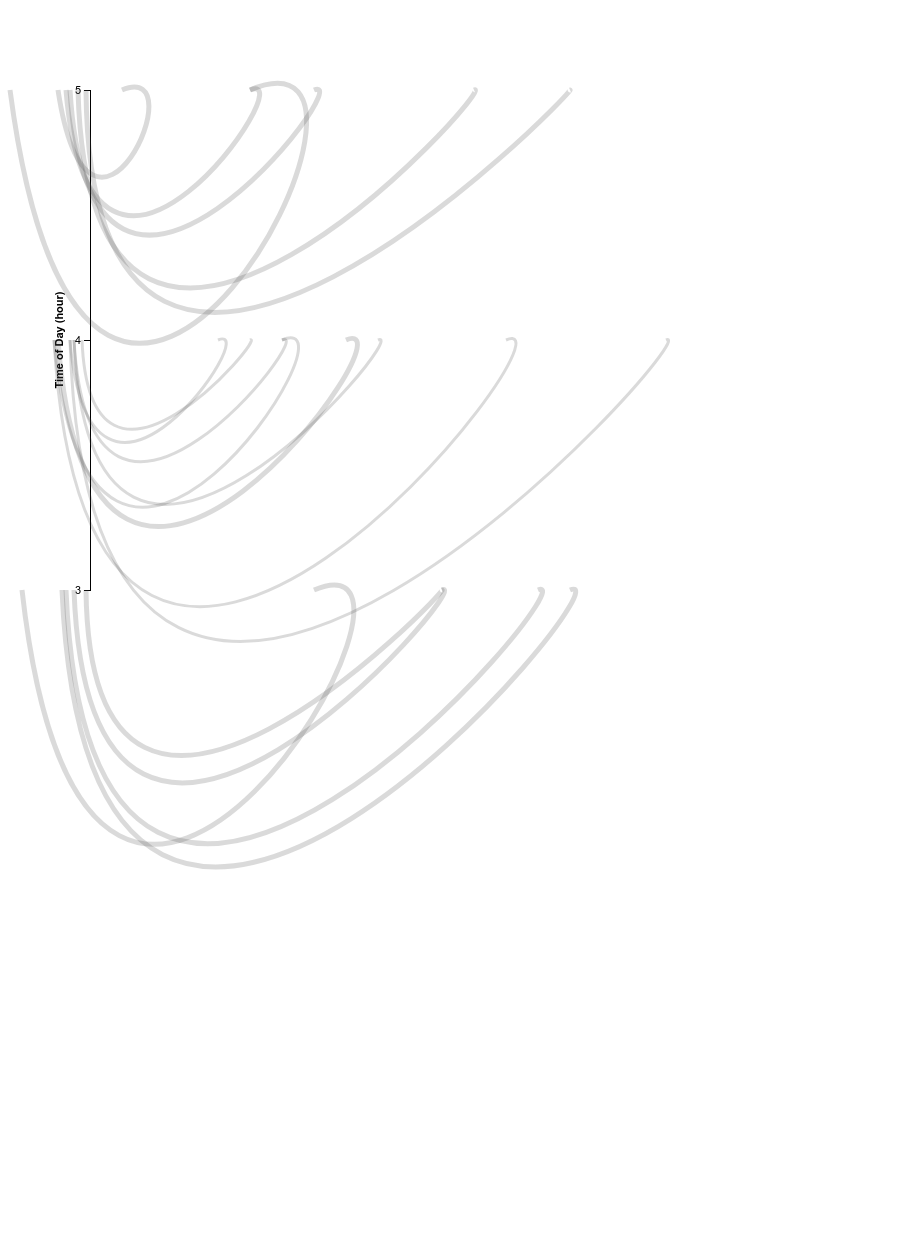

In [100]:
def route_x(route, total, width=800, height=100):
    def get_x(i):
        return float(width) * float(i)/float(total)

    return [{'seq':i, 'x': get_x(i)} for i in range(0, numStops)]


def each_od(od, total, width=800, height=100):
    
    def get_x(i):
        return float(width) * float(i)/float(total)
    
    start = od['srcseq']
    end = od['dstseq']
    
    mid = 0.5 * (end + start)
    sign = end - start / abs(end - start)
    dist = end - start
    if sign < 0:
        dist += total

    x0 = get_x(start)
    x1 = get_x(end)
    xc = get_x(0.3 * end + 0.7 * start)
    xc2 = get_x(0.7 * end + 0.3 * start)
    yc = -float(height) * float(dist)/float(total)

    path = "M {0} {1} C {2} {3}, {4} {5}, {6} {7}".format(x0,0, xc, yc, xc2, yc, x1, 0)
    
    od.update({
            'path': path,
        })

    return od

route = route_x(route, len(route))
ods = [each_od(od, len(route)) for od in ods]


spec = {
    "height": 500,
    "width": 800,
    "data": [
        {
            "name": "route",
            "values": route
        },
        {
            "name": "ods",
            "values": ods,
            "transform": [
                {"type": "facet", "groupby": ["hour"]}
            ]
        }        
    ],
    "scales": [
        {
            "name": "x",
            "domain": {"data": "route", "field": "seq"},
            "range": "width"
        },
        {
            "name": "y",
            "type": "ordinal",
            "domain": {"data": "ods", "field": "hour"},
            "range": "height",
            "points": True,
            "reverse": True
        }
    ],
    "axes": [
        {
            "type": "y",
            "scale": "y",
            "title": "Time of Day (hour)"
        }
    ],
    "marks": [
        {
            "type": "group",
            "from": {
                "data": "ods"
            },
            "scales": [
                {
                    "name": "pax",
                    "domain": {"field": "pax"},
                    "range": [0.2, 1]
                }
            ],
            "properties": {
                "enter": {
                    "y": {"scale": "y", "field": "hour"},
                    "height": {"scale": "y", "band": True}
                }
            },
            "marks": [
                {
                    "type": "symbol",
                    "from": {
                        "data": "route"
                    },                    
                    "properties": {
                        "enter": {
                            "x": {"field": "x"},
                            "fill": {"value": "#444"},
                            "size": {"value": 5}
                        }
                    }
                },
                {
                    "type": "path",
                    "properties": {
                        "enter": {
                            "path": {"field": "path"},
                            "stroke": {"value": "#444"},
                            "strokeWidth": {"scale": "pax", "field": "pax", "mult": 5},
                            "opacity": {"value": 0.2}
                        }
                    }
                }                
            ]
        }
    ]
}

Vega(spec, renderer='svg')